In [1]:
import numpy as np
import pandas as pd

In [2]:
input_size = 2
layers = [4,3]
output_size = 2

In [3]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis = 1, keepdims = True)
    return ans

In [4]:
# 3 Layer Network
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) # squeezes output between -1 and 1
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a2 = self.activation_outputs[1]
        a1 = self.activation_outputs[0]
        y_ = self.activation_outputs[2]
        m = x.shape[0]
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis = 0)/float(m)
        
        delta2 = (1-np.square(a2))*(np.dot(delta3,W3.T))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)/float(m)
        
        delta1 = (1-np.square(a1))*(np.dot(delta2,W2.T))
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis = 0)/float(m)
        
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
        
    def predict(self,x):
        y_out =  self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)
        

In [5]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [6]:
def one_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    
    return y_oht

In [7]:
from sklearn.datasets import make_circles,make_moons
import matplotlib.pyplot as plt

In [8]:
X,Y = make_moons(1000,shuffle = True, noise = 0.2, random_state = 1)

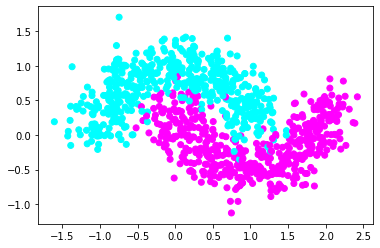

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.cool)
plt.show()

In [10]:
model = NeuralNetwork(input_size=2,layers=[10,4],output_size=2)

In [11]:
y_ = model.forward(X)

In [12]:
print(Y,y_)

[1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 

# Training Our Model

In [13]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [14]:
model.forward([X[0]])

array([[0.53169379, 0.46830621]])

In [15]:
def train(X,Y,model,epochs = 5000,learning_rate=0.01,logs = True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [16]:
training_loss = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3951
Epoch 1 Loss 0.2636
Epoch 2 Loss 0.2311
Epoch 3 Loss 0.2197
Epoch 4 Loss 0.2137
Epoch 5 Loss 0.2170
Epoch 6 Loss 0.2084
Epoch 7 Loss 0.2144
Epoch 8 Loss 0.1969
Epoch 9 Loss 0.2032
Epoch 10 Loss 0.1877
Epoch 11 Loss 0.1938
Epoch 12 Loss 0.1818
Epoch 13 Loss 0.1871
Epoch 14 Loss 0.1779
Epoch 15 Loss 0.1825
Epoch 16 Loss 0.1752
Epoch 17 Loss 0.1793
Epoch 18 Loss 0.1732
Epoch 19 Loss 0.1771
Epoch 20 Loss 0.1717
Epoch 21 Loss 0.1756
Epoch 22 Loss 0.1706
Epoch 23 Loss 0.1748
Epoch 24 Loss 0.1698
Epoch 25 Loss 0.1744
Epoch 26 Loss 0.1691
Epoch 27 Loss 0.1743
Epoch 28 Loss 0.1686
Epoch 29 Loss 0.1745
Epoch 30 Loss 0.1681
Epoch 31 Loss 0.1747
Epoch 32 Loss 0.1676
Epoch 33 Loss 0.1749
Epoch 34 Loss 0.1671
Epoch 35 Loss 0.1749
Epoch 36 Loss 0.1664
Epoch 37 Loss 0.1748
Epoch 38 Loss 0.1657
Epoch 39 Loss 0.1745
Epoch 40 Loss 0.1649
Epoch 41 Loss 0.1740
Epoch 42 Loss 0.1641
Epoch 43 Loss 0.1735
Epoch 44 Loss 0.1632
Epoch 45 Loss 0.1729
Epoch 46 Loss 0.1624
Epoch 47 Loss 0.1722
Ep

Epoch 468 Loss 0.0914
Epoch 469 Loss 0.0918
Epoch 470 Loss 0.0913
Epoch 471 Loss 0.0917
Epoch 472 Loss 0.0912
Epoch 473 Loss 0.0916
Epoch 474 Loss 0.0911
Epoch 475 Loss 0.0915
Epoch 476 Loss 0.0910
Epoch 477 Loss 0.0914
Epoch 478 Loss 0.0909
Epoch 479 Loss 0.0913
Epoch 480 Loss 0.0908
Epoch 481 Loss 0.0912
Epoch 482 Loss 0.0907
Epoch 483 Loss 0.0911
Epoch 484 Loss 0.0906
Epoch 485 Loss 0.0910
Epoch 486 Loss 0.0905
Epoch 487 Loss 0.0910
Epoch 488 Loss 0.0904
Epoch 489 Loss 0.0909
Epoch 490 Loss 0.0903
Epoch 491 Loss 0.0908
Epoch 492 Loss 0.0902
Epoch 493 Loss 0.0907
Epoch 494 Loss 0.0901
Epoch 495 Loss 0.0906
Epoch 496 Loss 0.0900
Epoch 497 Loss 0.0905
Epoch 498 Loss 0.0899
Epoch 499 Loss 0.0904


In [17]:
print(model.summary())

W1 (2, 10)
A1 (1000, 10)
W2 (10, 5)
A2 (1000, 5)
W3 (5, 2)
Y_ (1000, 2)
None


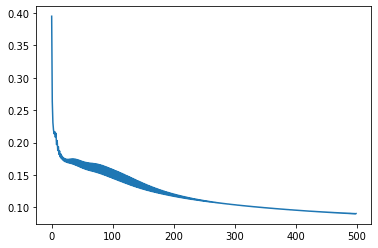

In [18]:
plt.plot(training_loss)
plt.show()

In [19]:
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

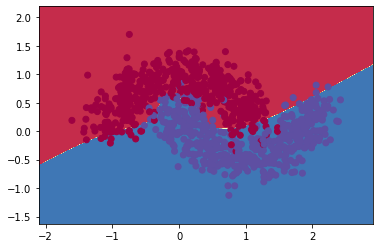

In [20]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [21]:
outputs = model.predict(X)

In [22]:
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print(training_accuracy)

0.931


# XOR Dataset


In [23]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
             ])
Y = np.array([0,1,1,0])

In [24]:
training_loss = train(X,Y,model,5000,0.05)

Epoch 0 Loss 1.3035
Epoch 1 Loss 0.6851
Epoch 2 Loss 0.2256
Epoch 3 Loss 0.0607
Epoch 4 Loss 0.0256
Epoch 5 Loss 0.0213
Epoch 6 Loss 0.0181
Epoch 7 Loss 0.0156
Epoch 8 Loss 0.0138
Epoch 9 Loss 0.0123
Epoch 10 Loss 0.0111
Epoch 11 Loss 0.0102
Epoch 12 Loss 0.0094
Epoch 13 Loss 0.0087
Epoch 14 Loss 0.0081
Epoch 15 Loss 0.0076
Epoch 16 Loss 0.0072
Epoch 17 Loss 0.0068
Epoch 18 Loss 0.0065
Epoch 19 Loss 0.0062
Epoch 20 Loss 0.0060
Epoch 21 Loss 0.0057
Epoch 22 Loss 0.0055
Epoch 23 Loss 0.0053
Epoch 24 Loss 0.0052
Epoch 25 Loss 0.0050
Epoch 26 Loss 0.0048
Epoch 27 Loss 0.0047
Epoch 28 Loss 0.0046
Epoch 29 Loss 0.0045
Epoch 30 Loss 0.0044
Epoch 31 Loss 0.0043
Epoch 32 Loss 0.0042
Epoch 33 Loss 0.0041
Epoch 34 Loss 0.0040
Epoch 35 Loss 0.0039
Epoch 36 Loss 0.0038
Epoch 37 Loss 0.0037
Epoch 38 Loss 0.0037
Epoch 39 Loss 0.0036
Epoch 40 Loss 0.0036
Epoch 41 Loss 0.0035
Epoch 42 Loss 0.0034
Epoch 43 Loss 0.0034
Epoch 44 Loss 0.0033
Epoch 45 Loss 0.0033
Epoch 46 Loss 0.0032
Epoch 47 Loss 0.0032
Ep

Epoch 508 Loss 0.0007
Epoch 509 Loss 0.0007
Epoch 510 Loss 0.0007
Epoch 511 Loss 0.0007
Epoch 512 Loss 0.0007
Epoch 513 Loss 0.0007
Epoch 514 Loss 0.0007
Epoch 515 Loss 0.0007
Epoch 516 Loss 0.0007
Epoch 517 Loss 0.0007
Epoch 518 Loss 0.0007
Epoch 519 Loss 0.0007
Epoch 520 Loss 0.0007
Epoch 521 Loss 0.0007
Epoch 522 Loss 0.0007
Epoch 523 Loss 0.0007
Epoch 524 Loss 0.0007
Epoch 525 Loss 0.0007
Epoch 526 Loss 0.0007
Epoch 527 Loss 0.0007
Epoch 528 Loss 0.0007
Epoch 529 Loss 0.0007
Epoch 530 Loss 0.0007
Epoch 531 Loss 0.0007
Epoch 532 Loss 0.0007
Epoch 533 Loss 0.0007
Epoch 534 Loss 0.0007
Epoch 535 Loss 0.0007
Epoch 536 Loss 0.0007
Epoch 537 Loss 0.0007
Epoch 538 Loss 0.0007
Epoch 539 Loss 0.0006
Epoch 540 Loss 0.0006
Epoch 541 Loss 0.0006
Epoch 542 Loss 0.0006
Epoch 543 Loss 0.0006
Epoch 544 Loss 0.0006
Epoch 545 Loss 0.0006
Epoch 546 Loss 0.0006
Epoch 547 Loss 0.0006
Epoch 548 Loss 0.0006
Epoch 549 Loss 0.0006
Epoch 550 Loss 0.0006
Epoch 551 Loss 0.0006
Epoch 552 Loss 0.0006
Epoch 553 

Epoch 1442 Loss 0.0003
Epoch 1443 Loss 0.0003
Epoch 1444 Loss 0.0003
Epoch 1445 Loss 0.0003
Epoch 1446 Loss 0.0003
Epoch 1447 Loss 0.0003
Epoch 1448 Loss 0.0003
Epoch 1449 Loss 0.0003
Epoch 1450 Loss 0.0003
Epoch 1451 Loss 0.0003
Epoch 1452 Loss 0.0003
Epoch 1453 Loss 0.0003
Epoch 1454 Loss 0.0003
Epoch 1455 Loss 0.0003
Epoch 1456 Loss 0.0003
Epoch 1457 Loss 0.0003
Epoch 1458 Loss 0.0003
Epoch 1459 Loss 0.0003
Epoch 1460 Loss 0.0003
Epoch 1461 Loss 0.0003
Epoch 1462 Loss 0.0003
Epoch 1463 Loss 0.0003
Epoch 1464 Loss 0.0003
Epoch 1465 Loss 0.0003
Epoch 1466 Loss 0.0003
Epoch 1467 Loss 0.0003
Epoch 1468 Loss 0.0003
Epoch 1469 Loss 0.0003
Epoch 1470 Loss 0.0003
Epoch 1471 Loss 0.0003
Epoch 1472 Loss 0.0003
Epoch 1473 Loss 0.0003
Epoch 1474 Loss 0.0003
Epoch 1475 Loss 0.0003
Epoch 1476 Loss 0.0003
Epoch 1477 Loss 0.0003
Epoch 1478 Loss 0.0003
Epoch 1479 Loss 0.0003
Epoch 1480 Loss 0.0003
Epoch 1481 Loss 0.0003
Epoch 1482 Loss 0.0003
Epoch 1483 Loss 0.0003
Epoch 1484 Loss 0.0003
Epoch 1485 

Epoch 2546 Loss 0.0002
Epoch 2547 Loss 0.0002
Epoch 2548 Loss 0.0002
Epoch 2549 Loss 0.0002
Epoch 2550 Loss 0.0002
Epoch 2551 Loss 0.0002
Epoch 2552 Loss 0.0002
Epoch 2553 Loss 0.0002
Epoch 2554 Loss 0.0002
Epoch 2555 Loss 0.0002
Epoch 2556 Loss 0.0002
Epoch 2557 Loss 0.0002
Epoch 2558 Loss 0.0002
Epoch 2559 Loss 0.0002
Epoch 2560 Loss 0.0002
Epoch 2561 Loss 0.0002
Epoch 2562 Loss 0.0002
Epoch 2563 Loss 0.0002
Epoch 2564 Loss 0.0002
Epoch 2565 Loss 0.0002
Epoch 2566 Loss 0.0002
Epoch 2567 Loss 0.0002
Epoch 2568 Loss 0.0002
Epoch 2569 Loss 0.0002
Epoch 2570 Loss 0.0002
Epoch 2571 Loss 0.0002
Epoch 2572 Loss 0.0002
Epoch 2573 Loss 0.0002
Epoch 2574 Loss 0.0002
Epoch 2575 Loss 0.0002
Epoch 2576 Loss 0.0002
Epoch 2577 Loss 0.0002
Epoch 2578 Loss 0.0002
Epoch 2579 Loss 0.0002
Epoch 2580 Loss 0.0002
Epoch 2581 Loss 0.0002
Epoch 2582 Loss 0.0002
Epoch 2583 Loss 0.0002
Epoch 2584 Loss 0.0002
Epoch 2585 Loss 0.0002
Epoch 2586 Loss 0.0002
Epoch 2587 Loss 0.0002
Epoch 2588 Loss 0.0002
Epoch 2589 

Epoch 3656 Loss 0.0001
Epoch 3657 Loss 0.0001
Epoch 3658 Loss 0.0001
Epoch 3659 Loss 0.0001
Epoch 3660 Loss 0.0001
Epoch 3661 Loss 0.0001
Epoch 3662 Loss 0.0001
Epoch 3663 Loss 0.0001
Epoch 3664 Loss 0.0001
Epoch 3665 Loss 0.0001
Epoch 3666 Loss 0.0001
Epoch 3667 Loss 0.0001
Epoch 3668 Loss 0.0001
Epoch 3669 Loss 0.0001
Epoch 3670 Loss 0.0001
Epoch 3671 Loss 0.0001
Epoch 3672 Loss 0.0001
Epoch 3673 Loss 0.0001
Epoch 3674 Loss 0.0001
Epoch 3675 Loss 0.0001
Epoch 3676 Loss 0.0001
Epoch 3677 Loss 0.0001
Epoch 3678 Loss 0.0001
Epoch 3679 Loss 0.0001
Epoch 3680 Loss 0.0001
Epoch 3681 Loss 0.0001
Epoch 3682 Loss 0.0001
Epoch 3683 Loss 0.0001
Epoch 3684 Loss 0.0001
Epoch 3685 Loss 0.0001
Epoch 3686 Loss 0.0001
Epoch 3687 Loss 0.0001
Epoch 3688 Loss 0.0001
Epoch 3689 Loss 0.0001
Epoch 3690 Loss 0.0001
Epoch 3691 Loss 0.0001
Epoch 3692 Loss 0.0001
Epoch 3693 Loss 0.0001
Epoch 3694 Loss 0.0001
Epoch 3695 Loss 0.0001
Epoch 3696 Loss 0.0001
Epoch 3697 Loss 0.0001
Epoch 3698 Loss 0.0001
Epoch 3699 

Epoch 4636 Loss 0.0001
Epoch 4637 Loss 0.0001
Epoch 4638 Loss 0.0001
Epoch 4639 Loss 0.0001
Epoch 4640 Loss 0.0001
Epoch 4641 Loss 0.0001
Epoch 4642 Loss 0.0001
Epoch 4643 Loss 0.0001
Epoch 4644 Loss 0.0001
Epoch 4645 Loss 0.0001
Epoch 4646 Loss 0.0001
Epoch 4647 Loss 0.0001
Epoch 4648 Loss 0.0001
Epoch 4649 Loss 0.0001
Epoch 4650 Loss 0.0001
Epoch 4651 Loss 0.0001
Epoch 4652 Loss 0.0001
Epoch 4653 Loss 0.0001
Epoch 4654 Loss 0.0001
Epoch 4655 Loss 0.0001
Epoch 4656 Loss 0.0001
Epoch 4657 Loss 0.0001
Epoch 4658 Loss 0.0001
Epoch 4659 Loss 0.0001
Epoch 4660 Loss 0.0001
Epoch 4661 Loss 0.0001
Epoch 4662 Loss 0.0001
Epoch 4663 Loss 0.0001
Epoch 4664 Loss 0.0001
Epoch 4665 Loss 0.0001
Epoch 4666 Loss 0.0001
Epoch 4667 Loss 0.0001
Epoch 4668 Loss 0.0001
Epoch 4669 Loss 0.0001
Epoch 4670 Loss 0.0001
Epoch 4671 Loss 0.0001
Epoch 4672 Loss 0.0001
Epoch 4673 Loss 0.0001
Epoch 4674 Loss 0.0001
Epoch 4675 Loss 0.0001
Epoch 4676 Loss 0.0001
Epoch 4677 Loss 0.0001
Epoch 4678 Loss 0.0001
Epoch 4679 

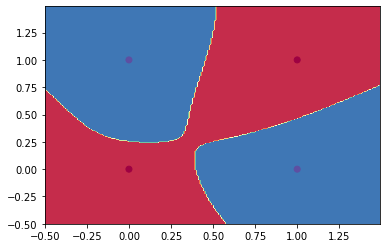

In [25]:
plot_decision_boundary(lambda x: model.predict(x),X,Y)

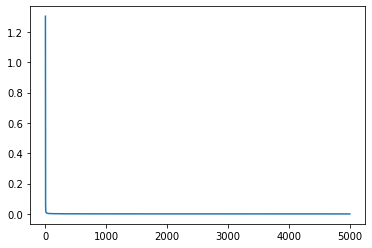

In [26]:
plt.plot(training_loss)

# Multiple Kind Of Datasets